In [15]:
def str_array2floats(strarray):
    floats=[]
    for s in strarray:
        try:
            floats.append(float(s))
        except:
            floats.append(np.nan)
    return floats
res=np.zeros((len(data_dfs),5))
thicks=np.zeros((len(data_dfs),5))
i=0
thicksum=[]
for df in data_dfs:
#     print(df['Resistivity(Ωm)'].values.astype(float))
    val=df['Resistivity(Ωm)'].values.astype(float)
    thk=str_array2floats(df['Thickness(m)'].values)
    res[i,0:len(val)]=np.array(val)
    thicks[i,0:len(val)]=np.array(thk)
    thicksum.append(np.nansum(thk))
    i+=1

# thicksum,thicks,res
vesdf.Location.values,vesdf.RL.values

# interp_df=pd.DataFrame(res,columns={'r1','r2','r3','r4','r5'})
rh=np.append(res,thicks,axis=1)
columns=['r1','r2','r3','r4','r5','h1','h2','h3','h4','h5']
interp_df=pd.DataFrame(rh,columns=columns)
interp_df['Total Depth']=thicksum
interp_df['Location']=vesdf['VES No.'].values.astype(int)
interp_df['Unique Id Of VES']=vesdf.Location.values
interp_df.to_csv('Interpretation of VES results.csv')
interp_df

,r1,r2,r3,r4,r5,h1,h2,h3,h4,h5,Total Depth,Location,Unique Id Of VES
0,11.1270,61.6660,142.600,4345.700,0.0,1.20730,3.92150,2.8793,NaN,0.0,8.00810,657,Tareechal kalan
1,12.8640,94.0380,9546.400,0.000,0.0,0.22813,5.41950,NaN,0.0000,0.0,5.64763,658,Bilt
2,34.7280,6.4535,43.136,2847.100,0.0,0.76110,2.96470,24.1610,NaN,0.0,27.88680,659,Kathu Pahari
3,10.7320,273.1300,2953.900,0.000,0.0,7.43000,34.83700,NaN,0.0000,0.0,42.26700,660,Garh khundhar
4,10.0850,7.5067,2299.300,0.000,0.0,2.21590,7.62270,NaN,0.0000,0.0,9.83860,661,Guwali
5,6.1921,11.9060,2882.000,0.000,0.0,0.21659,5.32550,NaN,0.0000,0.0,5.54209,662,Thoona
6,12.6800,5.9236,30.170,3732.500,0.0,1.05210,1.57920,19.8080,NaN,0.0,22.43930,663,Baghat
7,10.6180,36.3790,4970.500,42.869,2553.9,1.07480,3.35720,7.9560,9.6482,NaN,22.03620,664,Teela
8,2.8585,10.4170,8091.000,0.000,0.0,0.85394,4.73850,NaN,0.0000,0.0,5.59244,665,Palera
9,6.5324,18.5090,3649.500,498.540,8596.0,1.22330,5.31190,12.2060,52.9590,NaN,71.70020,666,BamhouriKalan


In [17]:
# vesdf

In [18]:
# Modules and data loading
import numpy as np
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
import matplotlib.colors as colors
from matplotlib.collections import PatchCollection
from matplotlib.patches import  Polygon
from mpl_toolkits.basemap import Basemap as Basemap

import sys
sys.path.append('..')
from pickle_fns import *
import math
from scipy.interpolate import griddata,interp2d
from scipy import spatial
from numpy import ones,vstack
from numpy.linalg import lstsq
vesdf,data_dfs=load_pkl('tikamgarh.pkl')
E,N,Ele=vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float),vesdf.RL.values.astype(np.float)

# plt.hist([len(v['Depth']) for v in volumelogs])
# lengths=[len(v['Lithology']) == len(v['Depth']) for v in volumelogs]
def clip_longer_logs(volumelogs):
    lengths=[len(v['Lithology'])  for v in volumelogs]
    ml=min(lengths)
    i=0
    for v in volumelogs:
        i +=1
        v['Depth']=v['Depth'][:ml]
        v['Lithology']=v['Lithology'][:ml]
    return volumelogs

# np.array(xi),sum(lengths)
def getasection(volumelogs,coords,x=78.8):
#     x=78.8
    coords=np.array(coords)
    closeid=np.argmin(abs(coords[:,0]-x),axis=0)
    sec_x=coords[closeid,0]
    # coords[:,0]-x
    x_index=np.where(coords[:,0]==sec_x)[0]
    sec_logs=[]
    for i in x_index:
    #     print(i)
        sec_logs.append(np.array(volumelogs[i]['Lithology'] ))
    return coords[x_index,0],coords[x_index,1],volumelogs[x_index[0]]['Depth'],np.array(sec_logs)
def gety(x,points):
    x_coords, y_coords = zip(*points)
    A = vstack([x_coords,ones(len(x_coords))]).T
    m, c = lstsq(A, y_coords)[0]
#     print("Line Solution is y = {m}x + {c}".format(m=m,c=c))
    return m*x+c
def get_indx_of_croockedline(coords,crooked_line):
    myKDTree = spatial.KDTree(coords)
    final_x=[]
    final_y=[]
    for i in range(1,len(crooked_line)):
        point_pair=np.array([crooked_line[i],crooked_line[i-1]])
    #     print(point_pair[:,0])

    #     
        sel_xi=xi[xi>=min(point_pair[:,0]) ]
        sel_xi=sel_xi[sel_xi<=max(point_pair[:,0])]
    #     break
        final_x.extend(sel_xi)
        final_y.extend(gety(sel_xi,point_pair))


    #get close_y index
    IND=[]
    for pt in zip(final_x,final_y):
        distance,index=myKDTree.query(pt)
        IND.append(index)
    return IND
def get_crooked_section(volumelogs,coords,xys):
#     x=78.8
    coords=np.array(coords)
    closeid=np.argmin(abs(coords[:,0]-x),axis=0)
    sec_x=coords[closeid,0]
    # coords[:,0]-x
    x_index=np.where(coords[:,0]==sec_x)[0]
    sec_logs=[]
    for i in x_index:
    #     print(i)
        sec_logs.append(np.array(volumelogs[i]['Lithology'] ))
    return coords[x_index,0],coords[x_index,1],volumelogs[x_index[0]]['Depth'],np.array(sec_logs)
def get_crooked_section(volumelogs,coords,xys):
#     x=78.8
    coords=np.array(coords)
    closeid=np.argmin(abs(coords[:,0]-x),axis=0)
    sec_x=coords[closeid,0]
    # coords[:,0]-x
    x_index=np.where(coords[:,0]==sec_x)[0]
    sec_logs=[]
    for i in x_index:
    #     print(i)
        sec_logs.append(np.array(volumelogs[i]['Lithology'] ))
    return coords[x_index,0],coords[x_index,1],volumelogs[x_index[0]]['Depth'],np.array(sec_logs)
def design_crooked_section(loc_array,vesdf):
    loc_coords=[]
    for loc in loc_array:
        loc_coords.append(vesdf[vesdf['VES No.']==str(loc)][['Easting','Northing']].values.astype(float))
  
    return np.array(loc_coords).ravel().reshape(len(loc_array),2)
def design_crooked_section_w_ele(loc_array,vesdf):
    loc_coords=[]
    for loc in loc_array:
        loc_coords.append(vesdf[vesdf['VES No.']==str(loc)][['Easting','Northing','RL']].values.astype(float))
  
    return np.array(loc_coords).ravel().reshape(len(loc_array),3)
def get_loc_lines(crooked_line,sec_logs):
    miny=min(crooked_line[:,1])
    maxy=max(crooked_line[:,1])
    perunit=len(sec_logs)/(maxy-miny)
    loc1x=[]
    loc1y=[]
    crooked_line
    for i in range(len(crooked_line)):
        lxval=(crooked_line[i,1]-miny)*perunit
        loc1x.append([lxval]*10)
        loc1y.append(list(range(0,400,40)))
    len(loc1x),len(loc1y),loc1x
    return loc1x,loc1y
def get_bound_index(v1darray):
    return np.where(v1darray[:-1] != v1darray[1:])[0]
# def loggify(thicks_of_loc,labels,interval):
#     rock_log=[]
#     depth_log=[0]
#     for layer,label in zip(thicks_of_loc,labels):
#         for dt in np.arange(0,layer,interval):
#             rock_log.append(label)
#             depth_log.append(depth_log[-1]+interval)
#     return {'Depth':depth_log[:-1],'Lithology':np.array(rock_log)}
def get_polysFromLayers(layers,xycoords,xi,yi):
    polys=[]

    ztbs=[]
    depth_on_cl=[np.zeros(len(xycoords))]
    for i in range(len(layers)):
#         print(i)
        j=0
        thk_on_cl=[]
        for xyind in xycoords[:,:]:
    #         print(j,end=',')
            indx,indy=np.where(xi==xyind[0])[0],np.where(yi==xyind[1])[0]
            thk_on_cl.append(layers[i][indx,indy][0])
            j +=1
        #     print(indx,indy)
        depth_on_cl=np.append(depth_on_cl,[depth_on_cl[-1]+thk_on_cl],axis=0)

    polygons=[]
    for i in range(1,len(depth_on_cl)):
    #     poly=[xycoords depth_on_cl
        xyz_top=np.append(xycoords.T,[depth_on_cl[i-1]],axis=0)
        xyz_bot=np.append(xycoords.T,[depth_on_cl[i]],axis=0)
        polygons.append(np.append(xyz_top.T,np.flipud(xyz_bot.T),axis=0))    
    return polygons,depth_on_cl
def get_polysFromLayers_mod(elevation,layers,xycoords,xi,yi):
    polys=[]

    ztbs=[]
    depth_on_cl=[]
    indeces=[]
    for xyind in xycoords[:,:]:
#         print(j,end=',')
        indx,indy=np.where(xi==xyind[0])[0],np.where(yi==xyind[1])[0]
        indeces.append([indx,indy])
        depth_on_cl.append(elevation[indx,indy][0])
    depth_on_cl=np.array([depth_on_cl])
    for i in range(len(layers)):
#         print(i)
        j=0
        thk_on_cl=[]
        for xyind in indeces:
    #         print(j,end=',')
#             indx,indy=np.where(xi==xyind[0])[0],np.where(yi==xyind[1])[0]
            thk_on_cl.append(layers[i][xyind[0],xyind[1]][0])
            j +=1
        #     print(indx,indy)
        depth_on_cl=np.append(depth_on_cl,[depth_on_cl[-1]+thk_on_cl],axis=0)

    polygons=[]
    for i in range(1,len(depth_on_cl)):
    #     poly=[xycoords depth_on_cl
        xyz_top=np.append(xycoords.T,[depth_on_cl[i-1]],axis=0)
        xyz_bot=np.append(xycoords.T,[depth_on_cl[i]],axis=0)
        polygons.append(np.append(xyz_top.T,np.flipud(xyz_bot.T),axis=0))    
    return polygons,depth_on_cl
def get_polysFromLayers_mod(elevation,layers,xycoords,xi,yi):
    polys=[]

    ztbs=[]
    depth_on_cl=[]
    indeces=[]
    fyi=np.flipud(yi)
    fxi=np.flipud(xi)
    for xyind in xycoords[:,:]:
#         print(j,end=',')
        indx,indy=np.where(xi==xyind[0])[0],np.where(yi==xyind[1])[0]
        indeces.append([indx,indy])
        depth_on_cl.append(elevation[indy,indx][0])
    depth_on_cl=np.array([depth_on_cl])
#     print(depth_on_cl)
    for i in range(len(layers)):
#         print(i)
        j=0
        thk_on_cl=[]
        for xyind in indeces:
    #         print(j,end=',')
#             indx,indy=np.where(xi==xyind[0])[0],np.where(yi==xyind[1])[0]
            thk_on_cl.append(layers[i][xyind[1],xyind[0]][0])
            j +=1
        #     print(indx,indy)
        depth_on_cl=np.append(depth_on_cl,[depth_on_cl[-1]+thk_on_cl],axis=0)

    polygons=[]
    for i in range(1,len(depth_on_cl)):
    #     poly=[xycoords depth_on_cl
        xyz_top=np.append(xycoords.T,[depth_on_cl[i-1]],axis=0)
        xyz_bot=np.append(xycoords.T,[depth_on_cl[i]],axis=0)
        polygons.append(np.append(xyz_top.T,np.flipud(xyz_bot.T),axis=0))    
    return polygons,depth_on_cl
def get_polysFromLayers_mod3d(elevation,layers,xycoords,xi,yi):
    polys=[]

    ztbs=[]
    depth_on_cl=[]
    indeces=[]
    fyi=np.flipud(yi)
    fxi=np.flipud(xi)
    for xyind in xycoords[:,:]:
#         print(j,end=',')
        indx,indy=np.where(xi==xyind[0])[0],np.where(yi==xyind[1])[0]
        indeces.append([indx,indy])
        depth_on_cl.append(elevation[indx,indy][0])
    depth_on_cl=np.array([depth_on_cl])
#     print(depth_on_cl)
    for i in range(len(layers)):
#         print(i)
        j=0
        thk_on_cl=[]
        for xyind in indeces:
    #         print(j,end=',')
#             indx,indy=np.where(xi==xyind[0])[0],np.where(yi==xyind[1])[0]
            thk_on_cl.append(layers[i][xyind[0],xyind[1]][0])
            j +=1
        #     print(indx,indy)
        depth_on_cl=np.append(depth_on_cl,[depth_on_cl[-1]+thk_on_cl],axis=0)

    polygons=[]
    for i in range(1,len(depth_on_cl)):
    #     poly=[xycoords depth_on_cl
        xyz_top=np.append(xycoords.T,[depth_on_cl[i-1]],axis=0)
        xyz_bot=np.append(xycoords.T,[depth_on_cl[i]],axis=0)
        polygons.append(np.append(xyz_top.T,np.flipud(xyz_bot.T),axis=0))    
    return polygons,depth_on_cl
def get_wellpolysFromLayers(well_one_side,layers,xycoords,xi,yi):
    polys=[]

    ztbs=[]
    depth_on_cl=[np.zeros(len(well_one_side))]
    for i in range(len(layers)):
#         print(i)
        j=0
        thk_on_cl=[]
        indx,indy=np.where(xi==xycoords[0])[0],np.where(yi==xycoords[1])[0]
        for xyind in well_one_side[:,:]:
            thk_on_cl.append(layers[i][indx,indy][0])
            j +=1
        #     print(indx,indy)
        depth_on_cl=np.append(depth_on_cl,[depth_on_cl[-1]+thk_on_cl],axis=0)
    depth_on_cl[0]=depth_on_cl[0]-10
    polygons=[]
    for i in range(1,len(depth_on_cl)):
    #     poly=[xycoords depth_on_cl
        xyz_top=np.append(well_one_side.T,[depth_on_cl[i-1]],axis=0)
        xyz_bot=np.append(well_one_side.T,[depth_on_cl[i]],axis=0)
        polygons.append(np.append(xyz_top.T,np.flipud(xyz_bot.T),axis=0))
    return polygons,depth_on_cl
def get_wellpolysFromLayers_mod(well_one_side,elevation,layers,xycoords,xi,yi):
    polys=[]

    ztbs=[]
    indx,indy=np.where(xi==xycoords[0])[0],np.where(yi==xycoords[1])[0]
#     elevation[indx,indy][0]
    depth_on_cl=[np.array([elevation[indy,indx][0]]*len(well_one_side))]
    for i in range(len(layers)):
#         print(i)
        j=0
        thk_on_cl=[]
        
        for xyind in well_one_side[:,:]:
            thk_on_cl.append(layers[i][indy,indx][0])
            j +=1
        #     print(indx,indy)
        depth_on_cl=np.append(depth_on_cl,[depth_on_cl[-1]+thk_on_cl],axis=0)
#     depth_on_cl[0]=depth_on_cl[0]-10
    polygons=[]
    for i in range(1,len(depth_on_cl)):
    #     poly=[xycoords depth_on_cl
        xyz_top=np.append(well_one_side.T,[depth_on_cl[i-1]],axis=0)
        xyz_bot=np.append(well_one_side.T,[depth_on_cl[i]],axis=0)
        polygons.append(np.append(xyz_top.T,np.flipud(xyz_bot.T),axis=0))
    return polygons,depth_on_cl

# def get_wellpolysFromLayers_mod3d(well_one_side,elevation,layers,xycoords,xi,yi):
#     polys=[]

#     ztbs=[]
#     indx,indy=np.where(xi==xycoords[0])[0],np.where(yi==xycoords[1])[0]
# #     elevation[indx,indy][0]
#     depth_on_cl=[np.array([elevation[indx,indy][0]]*len(well_one_side))]
#     for i in range(len(layers)):
# #         print(i)
#         j=0
#         thk_on_cl=[]
        
#         for xyind in well_one_side[:,:]:
#             thk_on_cl.append(layers[i][indx,indy][0])
#             j +=1
#         #     print(indx,indy)
#         depth_on_cl=np.append(depth_on_cl,[depth_on_cl[-1]+thk_on_cl],axis=0)
#     depth_on_cl[0]=depth_on_cl[0]-10
#     polygons=[]
#     for i in range(1,len(depth_on_cl)):
#     #     poly=[xycoords depth_on_cl
#         xyz_top=np.append(well_one_side.T,[depth_on_cl[i-1]],axis=0)
#         xyz_bot=np.append(well_one_side.T,[depth_on_cl[i]],axis=0)
#         polygons.append(np.append(xyz_top.T,np.flipud(xyz_bot.T),axis=0))
#     return polygons,depth_on_cl
def crook_triangle(loc,dist=0.005):
    return [[loc[0]-dist,loc[1]-dist],
     [loc[0]+dist,loc[1]-dist],
     [loc[0]+dist,loc[1]],
     [loc[0]-dist,loc[1]-dist],
    ]

In [19]:
ulablesfile='tikamgarh_thck_labels.npy'
layers_outfile='tikamgarh_layers.npz'
elev_file='tikamgarh_ele.npy'

npzfile=np.load(layers_outfile)
unique_lbls,lith_dict,xi,yi,layers=npzfile['arr_0'],npzfile['arr_1'],npzfile['arr_2'],npzfile['arr_3'],npzfile['arr_4']
elevation=np.load(elev_file)
color_def={'top_soil':'#CCCCCC','high_weath_gr':'#FFFF80','weather_gran':'#ACACFF','granite':'#F07800',
           'frac_granite':'#FF99CC','hard_granite':'#B00600','agranite':'#AF99Cd','final_granite':'#B006A0'}
facies_colors=[color_def[l] for l in color_def]

allLoc_numbers=vesdf['VES No.'].values.astype(np.int)
elevations=vesdf['RL'].values.astype(np.int)
# sections_old=[
#     [658,664,657,660,659],[659,660,657,661,667],[663,664,658,668],
#     [672,674,673],[667,661,660,659],[671,665,670]
# ]
sections=[
    [658,664,657,660,659],[673,669,666],[674,671,665,670],[673,674,672],
    [668,664,663],[669,667,661,659],[663,657,662,667,670]
]
sec_image_names=['A-A','B-B','C-C','D-D','E-E','F-F','G-G']

# sections_new=[
#     [658,664,657,660,659],[659,660,657,664,658],[663,657,662,667,666,665],
#     [672,674,673],[672,669,667,661],[674,671,665,670],[658,662,661]
# ]
# sec_image_names=['SW-NE-Twoards North','SW-E-North crecent','N_S western flank','Southern three','S to N Near North','Estern Three']

In [20]:



final_lbls=[u if u<10 else np.uint8(u/10) for u in unique_lbls]
nl,r,c=layers.shape
coords=[]
for i in range(r):
    for j in range(c):
        coords.append([xi[i],yi[j]])
polysets=[]
i=0
for section,sec_name in zip(sections,sec_image_names):
#     if i==1:
        print(section,sec_name)
        crooked_line=design_crooked_section(section,vesdf)
#         crooked_line=np.array(crooked_line).ravel().reshape(len(section),2)

    #     basemap_plot(vesdf,crooked_line,sec_name)
        polygons=[]
        for ic in range(1,len(crooked_line)):
            crookpart=np.append([crooked_line[ic-1]],[crooked_line[ic]],axis=0)
            xycoords=[]
            sec_logs=[]
            IND=get_indx_of_croockedline(coords,crookpart)
            for I in IND:
                xycoords.append(coords[I])
            sectionpart,depth_on_cl=get_polysFromLayers_mod(elevation,layers,np.array(xycoords),xi,yi)
            polygons.append(sectionpart)
#             break
        polysets.append(polygons)
       
        i +=1
#         break
np.save('polysets-new.npy',polysets)

[658, 664, 657, 660, 659] A-A
[673, 669, 666] B-B
[674, 671, 665, 670] C-C
[673, 674, 672] D-D
[668, 664, 663] E-E
[669, 667, 661, 659] F-F
[663, 657, 662, 667, 670] G-G


In [21]:
len(sections), len(polysets)

from scipy import spatial
myKDTree = spatial.KDTree(coords)
distance,index=myKDTree.query(location)

In [13]:
wellsets

{657: [[array([[  78.87232   ,   25.39906   , -211.98603806],
          [  78.88232   ,   25.39906   , -211.98603806],
          [  78.88232   ,   25.39906   , -209.99592844],
          [  78.87232   ,   25.39906   , -209.99592844]]),
   array([[  78.87232   ,   25.39906   , -209.99592844],
          [  78.88232   ,   25.39906   , -209.99592844],
          [  78.88232   ,   25.39906   , -206.66752239],
          [  78.87232   ,   25.39906   , -206.66752239]]),
   array([[  78.87232   ,   25.39906   , -206.66752239],
          [  78.88232   ,   25.39906   , -206.66752239],
          [  78.88232   ,   25.39906   , -203.50866404],
          [  78.87232   ,   25.39906   , -203.50866404]]),
   array([[  78.87232   ,   25.39906   , -203.50866404],
          [  78.88232   ,   25.39906   , -203.50866404],
          [  78.88232   ,   25.39906   , -183.96180669],
          [  78.87232   ,   25.39906   , -183.96180669]]),
   array([[  78.87232   ,   25.39906   , -183.96180669],
          [  78.88

In [12]:
#well polygons
wellsets={}
i=0
final_lbls=[u if u<10 else np.uint8(u/10) for u in unique_lbls]
myKDTree = spatial.KDTree(coords)

allLoc_numbers

crooked_line=design_crooked_section(allLoc_numbers,vesdf)
# crooked_line=np.array(crooked_line).ravel().reshape(len(allLoc_numbers),2)
for location,loc_no in zip(crooked_line,allLoc_numbers):
    loc_trainagle=crook_triangle(location,dist=0.005)
    wellpoly=[]

    distance,index=myKDTree.query(location)
    for ic in range(1,len(loc_trainagle)):
        well_one_side=np.append([loc_trainagle[ic-1]],[loc_trainagle[ic]],axis=0)
        face,depth_on_cl=get_wellpolysFromLayers_mod(well_one_side,elevation,layers,np.array(coords[index]),xi,yi)
        wellpoly.append(face)
    wellsets[loc_no]=wellpoly
#         print(wellpoly)
        
        
                
    #     #     basemap_plot(vesdf,crooked_line,sec_name)
    #         for location in crooked_line:
    # #             crookpart=np.append([crooked_line[ic-1]],[crooked_line[ic]],axis=0)
    #             points=points_in_circle_np(0.02, x0=location[0], y0=location[1] )

    #             xycoords=[]
    #             sec_logs=[]
    #             IND=get_indx_of_croockedline(coords,points)
    #             for I in IND:
    #                 xycoords.append(coords[I])
    #             wellpoly,depth_on_cl=get_polysFromLayers(layers,np.array(xycoords),xi,yi)
    #             wellsets.append(wellpoly)
    #     #             sec_logs.append(np.array(volumelogs[I]['Lithology'] ))
    #     #         zl= volumelogs[IND[0]]['Depth']
    #     #         # xycoords,zl,sec_logs
    #     #         sec_logs=np.array(sec_logs)
    #     #         loc1x,loc1y=get_loc_lines(crooked_line,sec_logs)
    #     #         yl=np.array(xycoords)[:,1]
    #     #         xl=np.array(xycoords)[:,0]
    #     #     #     polygons= make_polygons(sec_logs,unique_lbls,xl,yl)
    #     #         polygons= make_polygons2(sec_logs.copy().T,final_lbls,xl,yl,zl)
    #     #     #     plot2dSectionFromPolys(polygons,yl)
        
    i +=1
np.save('wellsets_ele-new.npy',wellsets)
# crooked_line
# closxid,closyid
# distance,index
mywellset=[]
for s in wellsets:
#     print(wellsets[s])
    mywellset.extend(wellsets[s])
np.save('mywellset_ele-new.npy',mywellset)

In [ ]:
# loc_trainagle,crookpart,xycoords
# IND=get_indx_of_croockedline(coords,crookpart)
# IND,crookpart
crooked_line
allLoc_numbers

d4plots=vesdf['VES No.'].values
E,N= vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float)
np.save('loc_info.npy',(E,N,Ele,allLoc_numbers))

In [190]:
# allLoc_numbers,crooked_line[:,0],E
# wellsets
# section_wellset
# for polygons in section_wellset:
#         for k in range(len(polygons)):
#             if len(polygons[k])>0:
#                 x=np.array(polygons[k][:,0])
# polygons

In [14]:
total_section

[[array([[  78.78644321,   25.46147663, -198.7605169 ],
         [  78.78748184,   25.46147663, -198.77941369],
         [  78.78852048,   25.4596819 , -198.89593525],
         [  78.78955912,   25.4596819 , -198.90840551],
         [  78.79059776,   25.45788717, -199.03971846],
         [  78.79163639,   25.45788717, -199.0458095 ],
         [  78.79267503,   25.45788717, -199.04744474],
         [  78.79371367,   25.45609244, -199.19001498],
         [  78.7947523 ,   25.45609244, -199.18574236],
         [  78.79579094,   25.45609244, -199.17688633],
         [  78.79682958,   25.45429772, -199.32736594],
         [  78.79786822,   25.45429772, -199.31235777],
         [  78.79890685,   25.45429772, -199.29330552],
         [  78.79994549,   25.45250299, -199.45219091],
         [  78.80098413,   25.45250299, -199.43259348],
         [  78.80202277,   25.45070826, -199.60953729],
         [  78.8030614 ,   25.45070826, -199.59747613],
         [  78.80410004,   25.45070826, -199.587

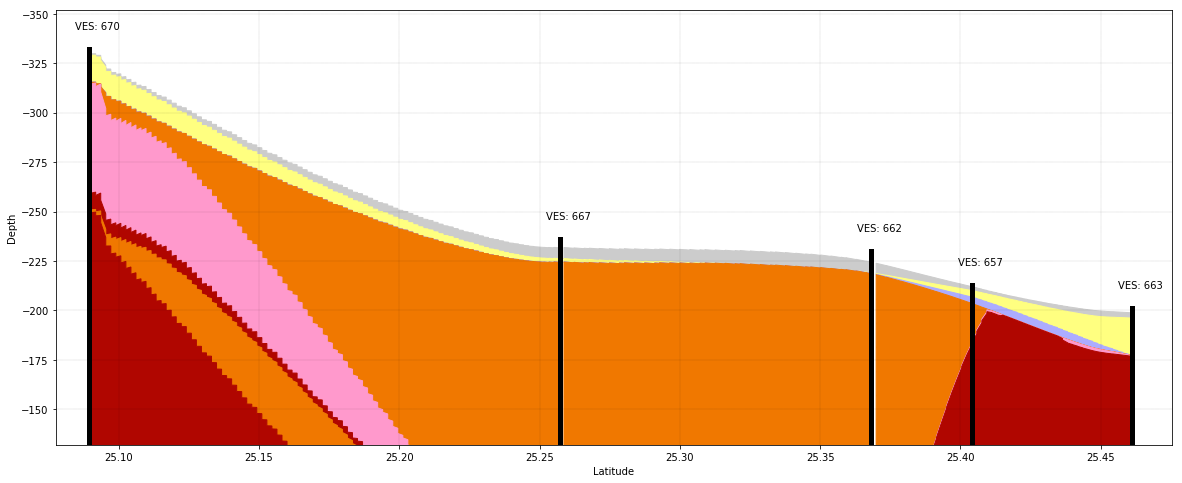

In [10]:
def add_2dpolygons(ax,polysets,normal_proj,correction=0):
    for polygons in polysets:
        for k in range(len(polygons)):
            if len(polygons[k])>0:
                x=np.array(polygons[k][:,0])
                y=np.array(polygons[k][:,1])
                z=np.array(polygons[k][:,2])
                if normal_proj:
                    polygon = Polygon(np.array([x+correction,z]).T, closed=True,color=facies_colors[final_lbls[k]],
                              fill=True, hatch='/')
                else:
                    polygon = Polygon(np.array([y+correction,z]).T, closed=True,color=facies_colors[final_lbls[k]],
                              fill=True, hatch='/')
                patches.append(polygon)
                mycolors.append(facies_colors[final_lbls[k]])
                ax.add_patch(polygon)
                
n=6
normal_proj=False
# normal_proj=True
# patches=[]
for total_section,section,image_name in zip(polysets[n:n+1],sections[n:n+1],sec_image_names[n:n+1]):
    crooked_line=design_crooked_section_w_ele(section,vesdf)
    patches=[]
    mycolors=[]
    f,ax=plt.subplots( figsize=(20, 8))
    add_2dpolygons(ax,total_section,normal_proj,correction=0)
    section_wellset=[]

        
#     for s in section:
#         add_2dpolygons(ax,wellsets[s],normal_proj,correction=0.002)
#         ax=add_polygons(ax,mywellset,flip=False)
        
#         section_wellset.append(wellsets[s])
#     add_2dpolygons(ax,section_wellset,normal_proj)
#     for polygons in total_section:        
#         for k in range(len(polygons)):
# #             print(k)
#             if len(polygons[k])>0:
#                 x=np.array(polygons[k][:,0])
#                 y=np.array(polygons[k][:,1])
#                 z=np.array(polygons[k][:,2])
# #                 cust_range=list(range(int(len(z)/2)))+list(range(int(len(z)/2),0,-1))
# #                 polygon = Polygon(np.array([cust_range,z]).T, True)
#                 if normal_proj:
#                     polygon = Polygon(np.array([x,z]).T, closed=True,color=facies_colors[final_lbls[k]],
#                               fill=True, hatch='/')
#                 else:
#                     polygon = Polygon(np.array([y,z]).T, closed=True,color=facies_colors[final_lbls[k]],
#                               fill=True, hatch='/')
#                 patches.append(polygon)
#                 mycolors.append(facies_colors[final_lbls[k]])
#                 ax.add_patch(polygon)

#     # fig, ax = plt.subplots()      
#     f,ax=plt.subplots( figsize=(20, 5))
#     colors = 100*np.random.rand(len(patches))
#     p = PatchCollection(patches, alpha=0.4)
#     p.set_array(np.array(mycolors))
# #     collection.set_facecolor(facies_colors[final_lbls[k]])
#     ax.add_collection(p)
#     f.colorbar(p, ax=ax)
    if normal_proj:
        crookInd=0
        xlabel='Longitude'
    else:
        xlabel='Latitude'
        crookInd=1
    for lx,ly,l in zip(crooked_line[:,crookInd],-crooked_line[:,2],section):
        ax.plot([lx,lx],[ly,200],'k',linewidth=5)
#         ax.plot(lx,ly,'k')
        ax.annotate('VES: '+str(l), xy=(lx-0.005, ly-10))

        ax.set_xlim(min(crooked_line[:,crookInd])-0.012,max(crooked_line[:,crookInd])+0.014)
#     ax.set_xlim(25.3,25.6)
#     ax.set_xlim(78.85,79)
#     ax.set_xlim(0,200)
    depth_max=max(crooked_line[:,2])
    ax.set_ylim(-depth_max-20,-depth_max+200)
    ax.invert_yaxis()
    ax.set_ylabel('Depth')
    ax.set_xlabel(xlabel)
    ax.grid(color='k', linestyle='-.', linewidth=0.1)
    #     ax.invert_xaxis()
    plt.show()
    f.savefig('new7lines_'+image_name+'_vsection.png')

In [310]:
vesdf[['RL','VES No.']]
crooked_line

array([[  78.7864 ,   25.4613 ,  201.     ],
       [  78.87732,   25.40406,  213.     ],
       [  78.90666,   25.36827,  230.     ],
       [  79.00739,   25.25739,  236.     ],
       [  79.27668,   25.08951,  332.     ]])

[658, 664, 657, 660, 659] A-A
[673, 669, 666] B-B
[674, 671, 665, 670] C-C
[673, 674, 672] D-D
[668, 664, 663] E-E
[669, 667, 661, 659] F-F
[663, 657, 662, 667, 670] G-G
Tikamgarh


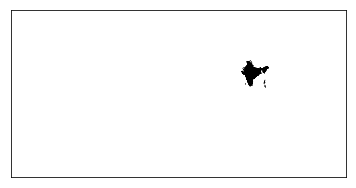

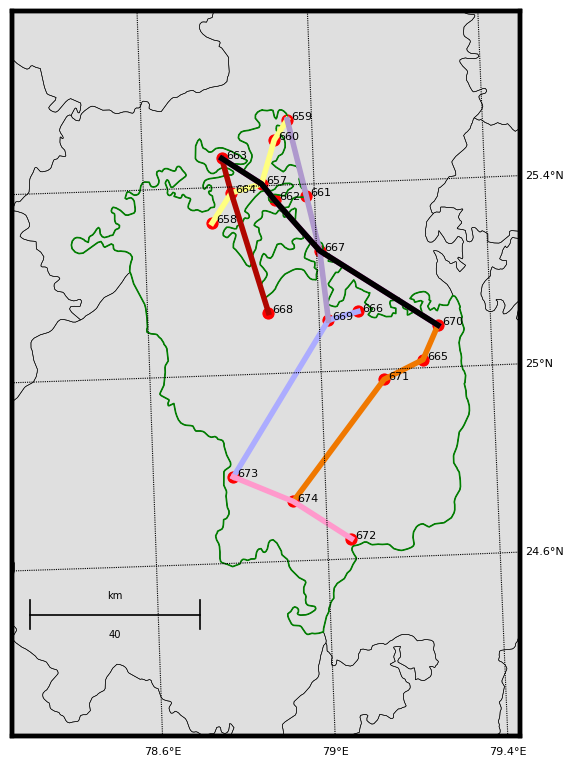

In [22]:

def basemap_plot(vesdf,crooked_line,image_name):
    file="D:\AI-ML\census\IND_adm\IND_adm2"
    map= Basemap()
    shp_info=map.readshapefile(file, 'IND_adm2')
    for info, lightning in zip(map.IND_adm2_info, map.IND_adm2):
        if(info['NAME_2']=='Tikamgarh'):
            print(info['NAME_2'])
            x, y = zip(*lightning) 
            break
    coords=np.array(lightning)

    lonpt, latpt = map(coords[:,0],coords[:,1],inverse=True)
    # divfac=10

#     vesdf,data_dfs=load_pkl('tikamgarh.pkl')
    labels=['Block', 'Date', 'Direction of Schlumberger Array', 'Distt',  
                   'Geology','Location', 'RL', 'VES No.', 'Water Table']
    d4plots=vesdf['VES No.'].values
    E,N= vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float)
    divfac=4
    lllon,urlon,lllat,urlat=np.floor(divfac*min(lonpt))/divfac,np.ceil(divfac*max(lonpt))/divfac,np.floor(divfac*min(latpt))/divfac,np.ceil(divfac*max(latpt))/divfac


    fig=plt.figure(figsize=(12,12),dpi=80, facecolor='w', edgecolor='k')
    map= Basemap(llcrnrlon=lllon,llcrnrlat=lllat,urcrnrlon=urlon,urcrnrlat=urlat,resolution = 'l', epsg=24379)
    shp_info=map.readshapefile(file, 'IND_adm2')
    ix,iy=map(x, y)
    map.plot(ix, iy, marker=None,color='g')
    i=1
    for crooked_line in crooked_lines:
        cl=crooked_line.copy()
        cl[:,0],cl[:,1]=map(crooked_line[:,0],crooked_line[:,1])
        map.plot(cl[:,0],cl[:,1],facies_colors[i],linewidth=5) 
        i+=1
    
    No = len(coords[:,0])
    area = 4 * np.ones(No)
    px,py=map(E,N)
    map.plot(cl[:,0],cl[:,1],'k',linewidth=5) 

    map.drawmapscale(78.50, 24.5, 0, 0, 40)
    # map.drawarrow()
    parallels =np.arange(24.2, 25.8,0.4)
    # labels = [left,right,top,bottom]
    map.drawparallels(parallels,labels=[False,True,True,False])
    meridians =  np.arange(78.2, 79.6,0.4)
    map.drawmeridians(meridians,labels=[True,False,False,True])
    map.drawmapboundary(fill_color='#dFdFdF',linewidth=4.0)
    plt.scatter(px,py,s=100, marker='o',c='r')
    for i, txt in enumerate(d4plots):
            plt.annotate(txt, (px[i]+1000, py[i]+100))
    plt.show()
    fig.savefig(image_name+'_bmap.png')
    
    
crooked_lines=[]
for section,sec_name in zip(sections,sec_image_names):
#     if i==1:
        print(section,sec_name)
        crooked_lines.append(design_crooked_section(section,vesdf))
basemap_plot(vesdf,crooked_lines,'basemap_of_fence')

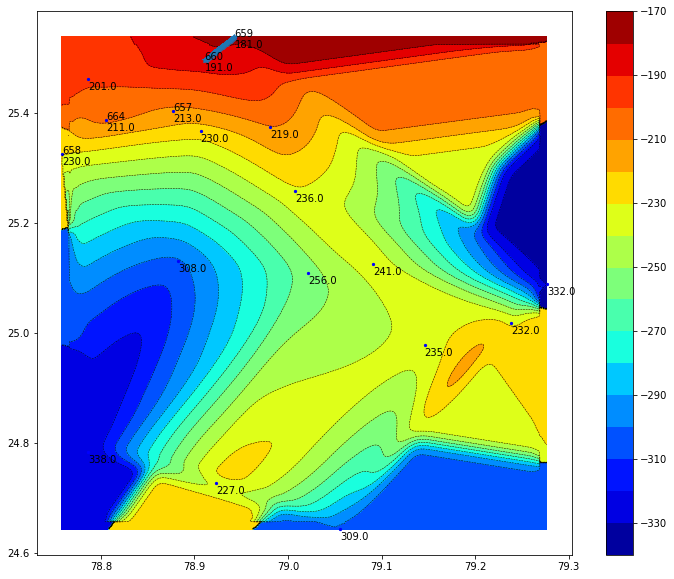

8

In [142]:
# list(range(int(len(z)/2)))+list(range(int(len(z)/2),0,-1))
# plt.plot(x,y,'*')
f=plt.subplots( figsize=(12, 10))
CS = plt.contour(xi,yi,elevation,15,linewidths=0.5,colors='k')

CS = plt.contourf(xi,yi,elevation,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
plt.scatter(E,N,marker='o',c='b',s=5)
for lx,ly,l in zip(E,N,Ele):
#         plt.plot(lx,ly,'k')
        plt.annotate(l, xy=(lx, ly-0.02))
for lx,ly,l in zip(crooked_line[:,0],crooked_line[:,1],section):
        plt.plot(lx,ly,'k')
        plt.annotate(str(l), xy=(lx, ly))
plt.plot(np.array(xycoords)[:,0],np.array(xycoords)[:,1],'*')
plt.show()
len(layers)

In [255]:
vesdf[['RL','VES No.']]
# crooked_line[:,2]

,RL,VES No.
0,213,657
1,230,658
2,181,659
3,191,660
4,219,661
5,230,662
6,201,663
7,211,664
8,232,665
9,241,666


In [103]:
np.array(xycoords)[:,0]

array([ 78.7584    ,  78.75943864,  78.76047727,  78.76151591,
        78.76255455,  78.76359319,  78.76463182,  78.76567046,
        78.7667091 ,  78.76774774,  78.76878637,  78.76982501,
        78.77086365,  78.77190228,  78.77294092,  78.77397956,
        78.7750182 ,  78.77605683,  78.77709547,  78.77813411,
        78.77917275,  78.78021138,  78.78125002,  78.78228866,
        78.78332729,  78.78436593,  78.78540457,  78.78644321,
        78.78748184,  78.78852048,  78.78955912,  78.79059776,
        78.79163639,  78.79267503,  78.79371367,  78.7947523 ,
        78.79579094,  78.79682958,  78.79786822,  78.79890685,
        78.79994549,  78.80098413,  78.80202277,  78.8030614 ,
        78.80410004,  78.80513868])

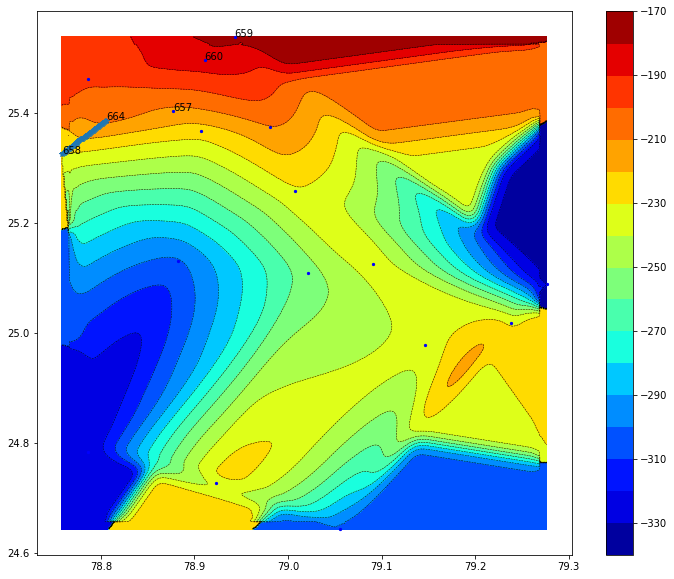

8

In [104]:
# list(range(int(len(z)/2)))+list(range(int(len(z)/2),0,-1))
# plt.plot(x,y,'*')
f=plt.subplots( figsize=(12, 10))
CS = plt.contour(xi,yi,elevation,15,linewidths=0.5,colors='k')

CS = plt.contourf(xi,yi,elevation,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
plt.scatter(E,N,marker='o',c='b',s=5)
# for lx,ly,l in zip(E,N,Ele):
#         plt.plot(lx,ly,'k')
#         plt.annotate(l, xy=(lx, ly))
for lx,ly,l in zip(crooked_line[:,0],crooked_line[:,1],section):
        plt.plot(lx,ly,'k')
        plt.annotate(str(l), xy=(lx, ly))
plt.plot(np.array(xycoords)[:,0],np.array(xycoords)[:,1],'*')
plt.show()
len(layers)

In [226]:
# crooked_line[:,0],crooked_line[:,1],section
for a in wellsets:
    print(a)

657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674


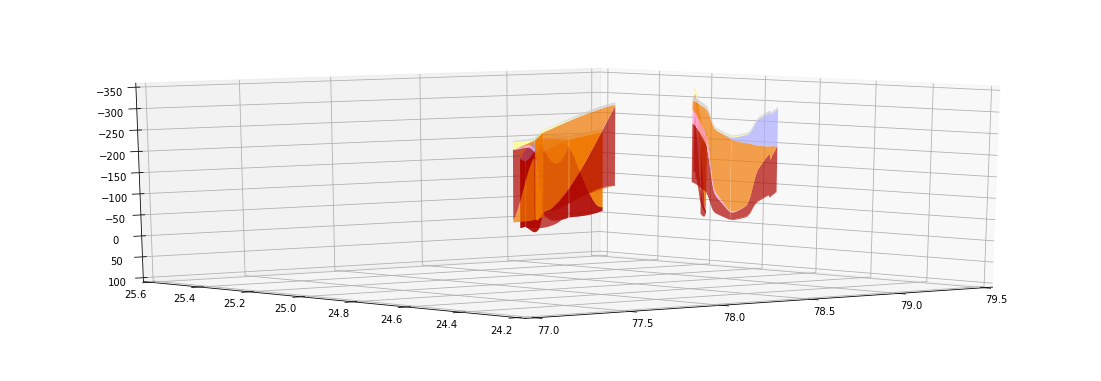

In [236]:
#3d plots or fence diagram
from   mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure(figsize=(15,5))
ax = Axes3D(fig)
final_lbls
n=5
for total_section in polysets:
# for total_section in polysets[n:n+1]:
    for polygons in total_section:
        for k in range(len(polygons)):

        #         print(k)
            if len(polygons[k])>0:
        #             x=np.append(polygons[k][:,0],np.flipud(polygons[k][:,0]))
        #             y=np.append(polygons[k][:,1],np.flipud(polygons[k][:,1]))
        #             z=np.append(polygons[k][:,2],np.flipud(polygons[k][:,3]))
                x=np.array(polygons[k][:,0])
                y=np.array(polygons[k][:,1])
                z=np.array(polygons[k][:,2])
#                 z=np.random.rand(len(x))/1000+z

                verts = [list(zip(x, y, z))]
                # print(verts)
                # ax.add_collection3d(Poly3DCollection(verts), zs='z')
                # collection = Poly3DCollection(poly3d, linewidths=1, alpha=0.2)

                collection = Poly3DCollection(verts, linewidths=1, alpha=0.7)
            #     face_color = [0.5, 0.5, 1] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
                collection.set_facecolor(facies_colors[final_lbls[k]])
                ax.add_collection3d(collection,zs='z')
    #             ax.plot(x,y,z,'*')
    #         ax

# ax.set_xlim((min(x),max(x)))
# ax.set_ylim((min(y),max(y)))
# ax.set_zlim((min(z),max(z)))
# ax.set_xlim((min(x)-0.4,max(x)+.4))
# ax.set_ylim((min(y)-.4,max(y)+.4))
ax.set_xlim((77,79.5))
ax.set_ylim((24.2,25.6))
ax.set_zlim((-350,100))
# ax.plot(x,y,z,'*')
ax.invert_zaxis()
ax.view_init(elev=10., azim=230)
# ax.scatter(x, y, z)
plt.show()       

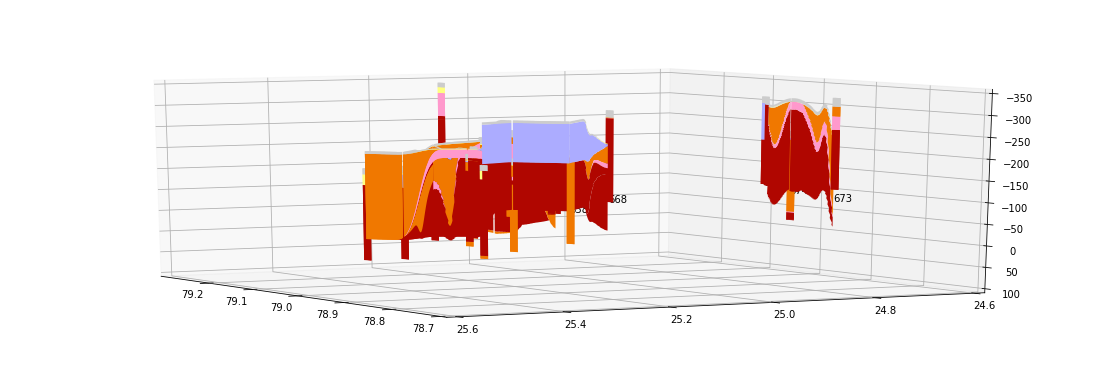

In [240]:
import numpy as np
import matplotlib.pyplot as plt
from   mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
def add_polygons(ax,polysets):
    for polygons in polysets:
        for k in range(len(polygons)):
            if len(polygons[k])>0:
                x=np.array(polygons[k][:,0])
                y=np.array(polygons[k][:,1])
                z=np.array(polygons[k][:,2])
                verts = [list(zip(x, y, z))]
                collection = Poly3DCollection(verts, linewidths=2, alpha=1)
                collection.set_facecolor(facies_colors[final_lbls[k]])
                ax.add_collection3d(collection,zs='z')
    return ax
facies_colors=np.load('facies_colors.npy')
total_section=np.load('polysets.npy')
wellsets=np.load('wellsets_ele.npy')
mywellset=np.load('mywellset_ele.npy')
# np.save('loc_info.npy',(E,N,allLoc_numbers))
E,N,allLoc_numbers=np.load('loc_info.npy')
# print(allLoc_numbers)
# polygons=np.load('polygons.npy')
final_lbls=np.load('final_lbls.npy')
fig = plt.figure(figsize=(15,5))
ax = Axes3D(fig)
for part_section in total_section:
    ax=add_polygons(ax,part_section)

# print(wellsets)
# for s in wellsets:
#     print(wellsets[s])
    # mywellset.append(wellsets[a])
ax=add_polygons(ax,mywellset)

for i in range(1,len(allLoc_numbers)):
    ax.text(E[i], N[i],-100,  '%s' % int(allLoc_numbers[i]), size=10, zorder=1,  
color='k') 
            # ax.plot(x,y,z,'*')

# ax.set_xlim((min(x),max(x)))
# ax.set_ylim((min(y),max(y)))
# ax.set_zlim((min(z),max(z)))
# ax.set_xlim((min(x)-0.4,max(x)+.4))
# ax.set_ylim((min(y)-.4,max(y)+.4))
ax.set_xlim((78.7,79.3))
# ax.set_xlim((78.6,79.0))
ax.set_ylim((24.6,25.6))
# ax.set_ylim((25.2,25.6))
ax.set_zlim((-350,100))
# ax.plot(x,y,z,'*')
ax.invert_zaxis()
ax.view_init(elev=10., azim=150)
# ax.scatter(x, y, z)
plt.show()  

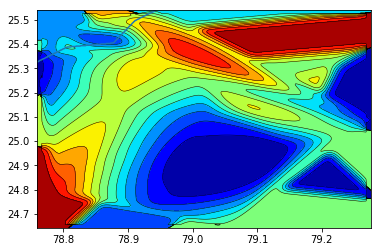

In [96]:

# # def plot_grid(xi,yi,zi):
CS = plt.contour(xi,yi,layers[0],15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,layers[0],15,cmap=plt.cm.jet)
# plt.colorbar() # draw colorbar
# # plt.show()
# # crooked_line
# IND=get_indx_of_croockedline(coords,crooked_line)
# # xycoords=np.array(xycoords)
plt.plot(xycoords[:,0],xycoords[:,1])
# plt.plot(crooked_line[:,0],crooked_line[:,1],'*r')
plt.show
# len(layers)
for I in xycoords[:,1]:
    ind=np.where(yi==I)
#     print(ind)
# dtype(xi),type(xycoords)
# xi

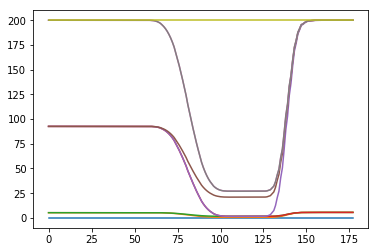

In [161]:
# depth_on_cl=[np.zeros(len(xycoords))]
# len(depth_on_cl),len(thk_on_cl),
# # len(np.append(depth_on_cl,[thk_on_cl],axis=0))
plt.plot(depth_on_cl.T)

In [287]:
np.save('facies_colors.npy',facies_colors)
np.save('final_lbls.npy',final_lbls)
np.save('polysets.npy',polysets)
# depth_on_cl[0]
# np.flipud
# print(xyz[:,0:5].T)
# print(np.flipud(xyz[:,0:5].T))
# print(np.append(xyz.T,np.flipud(xyz.T),axis=0))

In [10]:
def secshow(s):
    s=np.uint8(50*s.T)

    # cv2.imshow('draw contours',s)
    # cv2.waitKey(0)

    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image',s)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
unique_lbls

array([ 0,  1,  2,  3,  4,  5, 30, 50], dtype=int64)

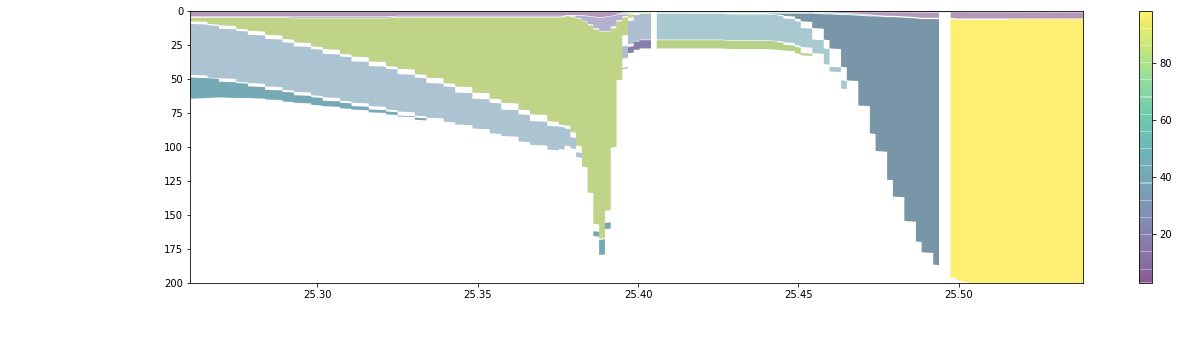

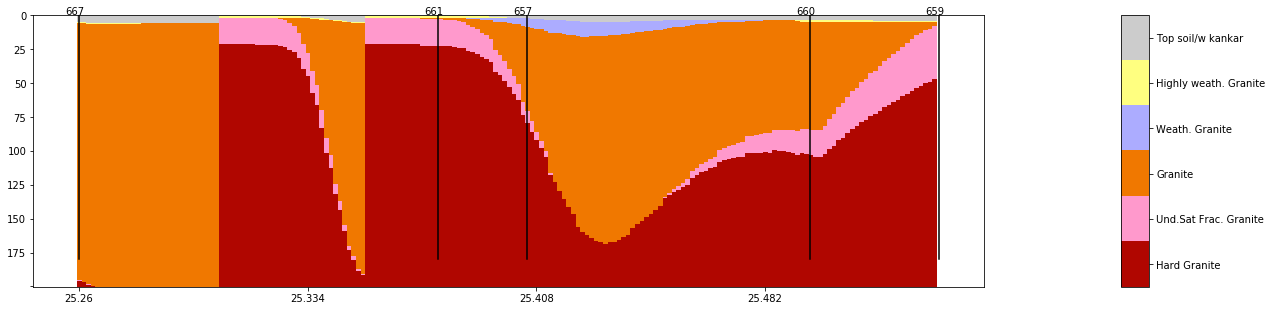

In [ ]:
# %matplotlib inline
# for polygons in polysets[2:5]:
#     plot2dSectionFromPolys(polygons,yl)
# # polygons
# fig = plt.figure(figsize=(15,5))
# ax = Axes3D(fig)
# for p in polygons:
# #     print(p[:,0])
#     plt.plot(p[:,0],p[:,2],'*')
# plt.show()
i=0
final_lbls=[u if u<10 else np.uint8(u/10) for u in unique_lbls]
for section,sec_name in zip(sections,sec_image_names):
    if i==1:
        locations=section
        crooked_line=design_crooked_section(section,vesdf)
        crooked_line=np.array(crooked_line).ravel().reshape(len(section),2)

    #     basemap_plot(vesdf,crooked_line,sec_name)
        xycoords=[]
        sec_logs=[]
        IND=get_indx_of_croockedline(coords,crooked_line)
        for I in IND:
            xycoords.append(coords[I])
            sec_logs.append(np.array(volumelogs[I]['Lithology'] ))
        zl= volumelogs[IND[0]]['Depth']
        # xycoords,zl,sec_logs
        sec_logs=np.array(sec_logs)

        loc1x,loc1y=get_loc_lines(crooked_line,sec_logs)
        yl=np.array(xycoords)[:,1]
        xl=np.array(xycoords)[:,0]
        polygons= make_polygons2(sec_logs.copy().T,final_lbls,xl,yl,zl)
        plot2dSectionFromPolys(polygons,yl)
        cross_section_plot(sec_logs,yl)
        secshow(sec_logs)
#     break
#     polysets.append(polygons)
    i +=1
